In [1]:
import dask
import dask.threaded
import dask.multiprocessing
from dask.distributed import Client

c = Client()


/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/distributed/dashboard/core.py:74: UserWarning: 
Failed to start diagnostics server on port 8787. [Errno 13] Permission denied
  warnings.warn("\n" + msg)


In [2]:
c

Client Scheduler: tcp://127.0.0.1:37058 Dashboard: http://127.0.0.1:45954/status,Cluster Workers: 8 Cores: 48 Memory: 134.91 GB


In [3]:
import xarray as xr 
import dask 
import numpy as np 
import os 
import time 
import glob
from datetime import date
import numpy.ma as ma

today=date.today()

#pip install windrose 
from windrose import WindroseAxes
import matplotlib.pyplot as plt

import seaborn as sns
sns.set(color_codes=True)

#https://pmall.univ-grenoble-alpes.fr/docs/auto_examples_code/windrose/windrose-exemple.html

/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:29: MatplotlibDeprecationWarning: 
The Appender class was deprecated in Matplotlib 3.1 and will be removed in 3.3.
  addendum = docstring.Appender(msg, "\n\n")
/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The copy_dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use docstring.copy() and cbook.dedent() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprecationWarning: 
The dedent function was deprecated in Matplotlib 3.1 and will be removed in 3.3. Use inspect.getdoc() instead.
  return lambda func: addendum(docstring.copy_dedent(base)(func))
/scratch/cnt0024/hmg2840/albert7a/anaconda3/lib/python3.7/site-packages/windrose/windrose.py:30: MatplotlibDeprec

In [28]:
mag_file = '/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/1h/turner-angle/NATL60-CJM165_magR_20120901.1d_AC.nc'
tu_file='/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/1h/turner-angle/NATL60-CJM165_Tu_20120901.1d_AC.nc'
dsmag=xr.open_dataset(mag_file)
dstu=xr.open_dataset(tu_file)

FileNotFoundError: [Errno 2] No such file or directory: b'/scratch/cnt0024/hmg2840/albert7a/NATL60/NATL60-CJM165-S/1h/turner-angle/NATL60-CJM165_Tu_20120901.1d_AC.nc'

In [5]:
dsmag

<xarray.Dataset>
Dimensions:        (z: 2545455)
Coordinates:
    nav_lat        (z) float32 ...
    nav_lon        (z) float32 ...
    time_centered  (z) datetime64[ns] ...
    x              (z) int64 ...
    y              (z) int64 ...
    time_counter   (z) datetime64[ns] ...
Dimensions without coordinates: z
Data variables:
    magR           (z) float64 ...
Attributes:
    global_attribute:  Stack of absolute value of ratio between temperature a...

In [6]:
dstu

<xarray.Dataset>
Dimensions:        (z: 2545455)
Coordinates:
    nav_lat        (z) float32 ...
    nav_lon        (z) float32 ...
    time_centered  (z) datetime64[ns] ...
    x              (z) int64 ...
    y              (z) int64 ...
    time_counter   (z) datetime64[ns] ...
Dimensions without coordinates: z
Data variables:
    Tu             (z) float64 ...
Attributes:
    global_attribute:  Stack of turner angle of data for day 20120901

In [7]:
magR_AC=dsmag['magR']
Tu_AC=dstu['Tu']

Text(0.5, 1.0, 'turner angle - AC box')

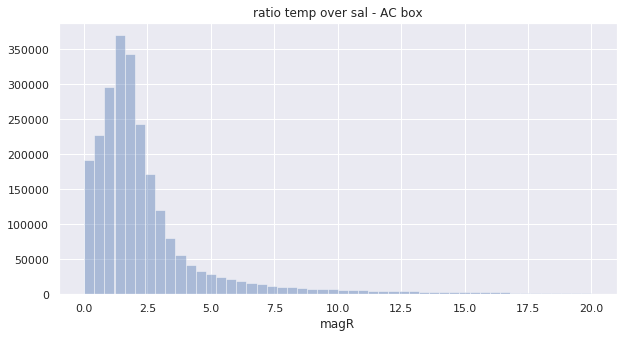

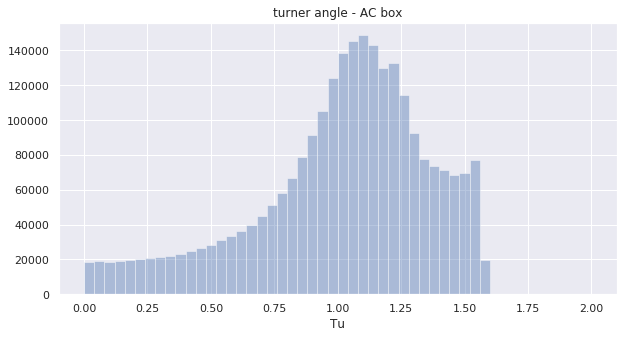

In [8]:
fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_axes()    # creates the axes of specified dimensions

sns.distplot(magR_AC,hist=True, kde=False,hist_kws={"range": [0,20]})
plt.title('ratio temp over sal - AC box')

fig = plt.figure(figsize=(10, 5))

ax1 = fig.add_axes()    # creates the axes of specified dimensions

sns.distplot(Tu_AC,hist=True, kde=False,hist_kws={"range": [0,2]})
plt.title('turner angle - AC box')


distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)
distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


([<matplotlib.projections.polar.RadialTick at 0x2b727c6d6588>,
 <a list of 3 Text yticklabel objects>)

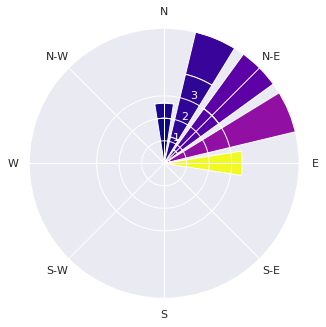

distributed.utils_perf - WARNING - full garbage collections took 10% CPU time recently (threshold: 10%)


In [27]:
fig = plt.figure(figsize=(10, 5))

rectangle = [0.1, 0.1, 0.75, 0.75]
ax = WindroseAxes(fig,rectangle)
fig.add_axes(ax)
ax.bar(Tu_AC[0:1500]*180/np.pi, magR_AC[0:1500], normed=True,opening=0.8, edgecolor='white',bins=np.arange(0,5,0.1),cmap=plt.get_cmap('plasma'))
ax.set_ylim(0,6)
plt.yticks(ticks=np.arange(1,4,1),labels=np.arange(1,4,1),color='w')
#ax.set_title("annual", position=(0.5, 1.1))

#ax.set_legend()
#ax.legend(title="wind speed (m/s)", loc=(1.1, 0))